<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

## Integrantes

* Andrés Huerta - 201473544-8 - andres.huerta.14@sansano.usm.cl
* Felipe Vega - 201473511-1 - felipe.vega.14@sansano.usm.cl



<hr style="height:2px;border:none"/>

In [15]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# 1.- Job Salary Prediction

En esta sección de la tarea se predecirá el salario que ofrece un anuncio a partir del texto de dicho anuncio. Para esto se utiliza un dataset propuesto por _**Adzuna**_ en la plataforma _**Kaggle**_ (__[link](https://www.kaggle.com/c/job-salary-prediction)__). 

<hr style="height:2px;border:none"/>

> a) Carge los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto? 

Utilizando la librería _**Pandas**_ se carga el dataset y se separa en dos conjuntos: uno para validación, compuesto de los últimos 10000 registros y el otro para training compuesto de los registros restantes.

In [175]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#csv desde drive
#from google.colab import drive
#drive.mount('/content/drive')

data = pd.read_csv("Train_rev1.csv.xz")
train_data = data.iloc[:-10000]
val_data = data.iloc[-10000:]






Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
Id                    244768 non-null int64
Title                 244767 non-null object
FullDescription       244768 non-null object
LocationRaw           244768 non-null object
LocationNormalized    244768 non-null object
ContractType          65442 non-null object
ContractTime          180863 non-null object
Company               212338 non-null ob

Se utiliza la función _head_ de Pandas para ver los primeros 5 registros del dataset. Este cuenta con 12 columnas incluyendo distinta información sobre las ofertas de trabajo.

In [187]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
Id                    244768 non-null int64
Title                 244767 non-null object
FullDescription       244768 non-null object
LocationRaw           244768 non-null object
LocationNormalized    244768 non-null object
ContractType          65442 non-null object
ContractTime          180863 non-null object
Company               212338 non-null object
Category              244768 non-null object
SalaryRaw             244768 non-null object
SalaryNormalized      244768 non-null int64
SourceName            244767 non-null object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


Se observa que el dataset completo contiene 244768 registros. En este caso se utilizarán las columnas **"FullDescription"** como input y **SalaryNormalized** como output. **FullDescription** contiene el texto de la oferta de trabajo y **SalaryNormalized** es el salario anual interpretado por _Adzuna_. Se puede ver que ninguno de los dos campos tiene valores nulos.

Como el conjunto de validación está compuesto por los últimos 10000 registros, el conjunto de entrenamiento contiene 234768 datos.



In [2]:
data.SalaryNormalized.describe()

count    244768.000000
mean      34122.577576
std       17640.543124
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64

Haciendo uso de la función _describe_ de _Pandas_ se obtienen se obtienen estadísticos para el _SalaryNormalized_. Se puede ver que el máximo valor es de 200000, pero el percentil 75 es de 42500, esto indica que se pueden esperar outliers en el conjunto de datos, sobretodo al considerar que la desviación estándar es de 17640.

In [3]:
data.SalaryNormalized.unique().size

8454

Por otro lado, la cantidad de valores únicos para este campo es de 8454, lo que entrega una idea de la dificultad que tendría enfrentar este problema utilizando un clasificador.

Para ver la distribución de estos valores se construye un histograma para el conjunto completo.

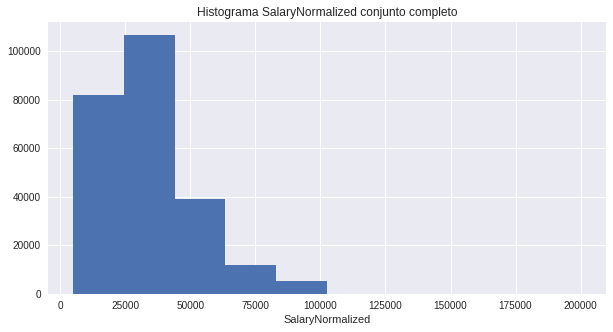

In [4]:
plt.figure(figsize=(10,5))
plt.title("Histograma SalaryNormalized conjunto completo")
data.SalaryNormalized.hist()
plt.xlabel("SalaryNormalized")
plt.show()

Se observa que la gran mayoria de los salarios anuales se concentran entre los 25000 y los 50000 anuales. Además se cuenta con un sesgo positivo en la distribución de los datos.

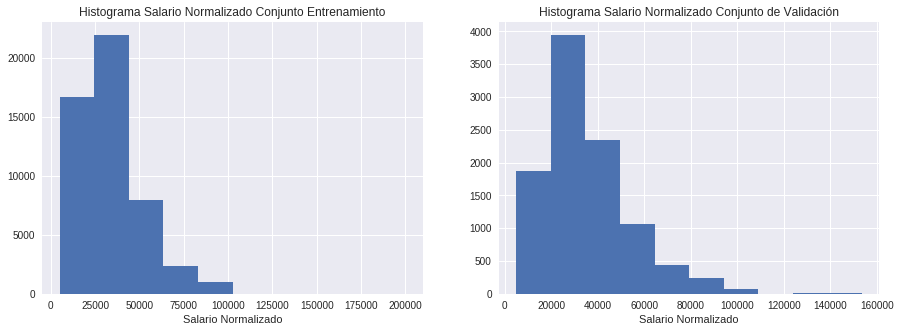

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Histograma Salario Normalizado Conjunto Entrenamiento")
train_data.SalaryNormalized.hist()
#plt.yticks([0, hist.max()],[0,120000])
plt.xlabel("Salario Normalizado")

plt.subplot(122)
plt.title("Histograma Salario Normalizado Conjunto de Validación")
plt.xlabel("Salario Normalizado")
val_data.SalaryNormalized.hist()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


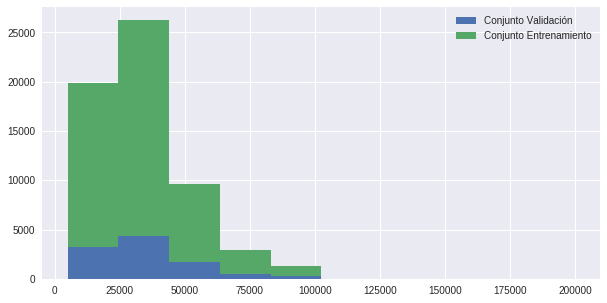

In [6]:
plt.figure(figsize=(10,5))
plt.hist([val_data.SalaryNormalized,train_data.SalaryNormalized],stacked=True, label=['Conjunto Validación','Conjunto Entrenamiento'])
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


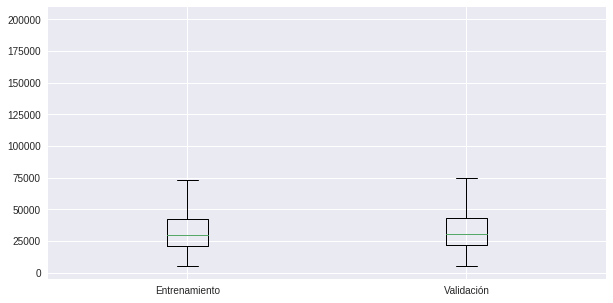

In [7]:
plt.figure(figsize=(10,5))
plt.boxplot([train_data.SalaryNormalized, val_data.SalaryNormalized])
plt.xticks([1, 2], ['Entrenamiento', 'Validación'])
#val_data.boxplot(column="SalaryNormalized")
#train_data.boxplot(column="SalaryNormalized")
plt.show()

> b) Extraiga los datos de cada conjunto con los que trabajará, el *input* $X$, los textos, y el *output* $y$, los salarios.

In [0]:
train_sample = train_data.sample(10000)
val_sample = val_data.sample(1000)

text_validation = val_sample.FullDescription
text_train = train_sample.FullDescription
salary_validation = val_sample.SalaryNormalized
salary_train = train_sample.SalaryNormalized

Debido a la cantidad de datos en cada conjunto se muestrea ambos conjutos para trabajar con datos reducidos. Se separa el input a utilizar para el conjunto de entrenamiento y el de validación, lo mismo se hace para el output esperado para ambos conjuntos.

> c) Realice un pre-procesamiento a los datos brutos de texto para extraer características y generar la representación de los datos de entrada al modelo $\vec{x}$. Comente sobre lo realizado.


Debido a que el texto a utilizar se obtiene directamente desde el anuncio, este no se encuentra estructurado y menos con una representación vectorial para utilizar como input.

Lo primero a realizar para obtener una representación vectorial es reemplazar multiples letras (3 o más) por solo dos para así corregir un posible error de tipeo. 

Luego, utilizando la librería _**nltk**_ (natural language toolkit) se obtiene un conjunto de _**stopwords**_[1], las cuales corresponden a palabras comunes que en lenguaje, por lo que no aporta mucho al análisis. 

Para continuar se obtienen tokens (instancia de una palabra) para cada texto, los cuales se pasan a minusculas y se someten a un proceso de _**Lematización**_ [2]. Este es un proceso donde una palabra dada en una flexionada (conjugada, plurales, etc) se obtiene su lema o representante de todas las formas flexionadas de una misma palabra.

Finalmente se revisa si los tokens obtenidos luego de la Lematización pertenecen a las stopwords o no, donde en caso de pertenecer se eliminan del texto.

In [180]:
# NOTA, Si ya posee los paquetes de nltk, se debe ingresar la letra "q" para continuar
# con la ejecución

import re, time, nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor1(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

#def word_extractor2(text):
#    wordstemmer = PorterStemmer()
#    commonwords = stopwords.words('english')
#    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
#    words = ""
#    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
#    for word in wordtokens:
#        if word not in commonwords:
#            words+=" "+word
#    return words

#print(word_extractor1("Hello mauro, i love sushi"))
#print(word_extractor2("Hello mauro, I love sushi"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
texts_train1 = [word_extractor1(text) for text in text_train]
texts_val1 = [word_extractor1(text) for text in text_validation]
#texts_train2 = [word_extractor2(text) for text in text_train]
#texts_val2 = [word_extractor2(text) for text in text_validation]

Una vez realizado el proceso se genera una representación vectorial para el texto. Para esto se considera un vocabulario de todos los tokens que aparecen en los textos y se cuenta la ocurrencia de cada uno en cada ejemplo. Con esto se pasa a una representación vectorial donde la componente $ x_i $ corresponde al número de ocurrencias de la palabra $i$ del vocabulario en el texto representado. En este caso, la cantidad de ocurrencias se ajusta a 1, por lo que lo que se obtiene es si la palabra está presente en el texto o no.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer1.fit(np.asarray(texts_train1))
#vectorizer2 = CountVectorizer(ngram_range=(1, 1), binary='False')
#vectorizer2.fit(np.asarray(texts_train2))

features_train1 = vectorizer1.transform(texts_train1)
features_val1 = vectorizer1.transform(texts_val1)
#features_train2 = vectorizer1.transform(texts_train2)
#features_val2 = vectorizer1.transform(texts_val2)

labels_train = np.asarray(salary_train)
labels_val = np.asarray(salary_validation)



In [183]:

len(vectorizer1.get_feature_names())

34110

En este caso se cuenta con un vocabulario de **$\approx$34110**, lo que indica el número de features/atributos que se utilizarán para predecir el salario anual.

> d) Intente resolver el problema enfrentándolo como regresión con el modelo de regresión lineal ordinaria en *sklearn*. ¿Qué es lo que hace *fit_intercept=True*? Evalúe la función objetivo (F.O.) utilizada y la métrica de la competencia (*mean absolute error*) en ambos conjuntos generados en el punto a). Comente lo observado.

Aprovechando la librería _sklearn_ se entrena un modelo de regresión lineal ordinaria. El parámetro **fit_intercept=True** se utiliza cuando no se sabe si los datos están centrados y hace que el modelo considere un intercepto. 


In [184]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error

def do_LINREG(X_train, Y_train, X_val, Y_val):
    model = LR(fit_intercept=True, normalize=False)
    model.fit(X_train,Y_train)
    print("FO on train: ", model.score(X_train, Y_train))
    print("FO on validation: ", model.score(X_val, Y_val))
    print("MAE on train: ",mean_absolute_error(Y_train, model.predict(X_train)))
    print("MAE on validation: ",mean_absolute_error(Y_val, model.predict(X_val)))
    return model
  
LinregModel1 = do_LINREG(features_train1, labels_train, features_val1, labels_val)

FO on train:  0.9997084139248713
FO on validation:  -0.6912919228612104
MAE on train:  9.659248408830946
MAE on validation:  17417.707531193693


_Sklearn_ utiliza el coeficiente de determinación como función objetivo, el cual indica que tan buena es la predicción del modelo. En este caso, se obtiene un coeficiente de determinación de 0.99 para el conjunto de entrenamiento y -0.69 para el conjunto de validación. Esto indica que existe un alto overfitting para el regresor obtenido. Una posible explicación para este overfitting es la maldición de la dimensionalidad, debido a que el número de atributos/dimensiones ($\approx$ 34110) es mucho mayor que la cantidad de datos del conjunto de entrenamiento (10000). En el caso del MAE se obtiene una diferencia similar entre los resultados obtenidos por los dos conjuntos.

Para mejorar este resultado se cambia el enfoque de regresión a clasificación. Para esto primero se intenta un enfoque basado en el modelo de regresión logístico de _sklearn_, debido a que es un modelo más cercano para los autores. Sin embargo, luego de investigar se decidió utilizar un enfoque basado en SVC (Support Vector Classificator), dados sus resultados para problemas con grandes dimensiones y muchas clases. 

Este tipo de enfoque considera los ejemplos como puntos en el espacio y genera fronteras para determinar las clases. En este caso se utilizan fronteras del tipo lineal.

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
def do_LOGIT(X_train,Y_train, X_val,Y_val):
    model = LogisticRegression()
    model = model.fit(X_train, Y_train)
    #print("Accuracy under training: ",model.score(x,y))
    #print("Accuracy under validation: ",model.score(xv,yv))
    print("MAE on train: ",mean_absolute_error(Y_train, model.predict(X_train)))
    print("MAE on validation: ",mean_absolute_error(Y_val, model.predict(X_val)))
    return model

logisticModel = do_LOGIT(features_train1, labels_train, features_val1, labels_val)  
  

MAE on train:  10.2134
MAE on validation:  10366.391


In [186]:
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
def do_SVC(X_train, Y_train, X_val, Y_val):
  model = SVC(kernel='linear')
  model.fit(X_train, Y_train)
  print("MAE on train: ",mean_absolute_error(Y_train, model.predict(X_train)))
  print("MAE on validation: ",mean_absolute_error(Y_val, model.predict(X_val)))
  return model

SVC_model = do_SVC(features_train1, labels_train, features_val1, labels_val)

MAE on train:  11.5034
MAE on validation:  9636.472


En el caso del regresor logístico se obtiene un MAE de $\approx$ 10366.391 para el conjunto de validación, lo cual mejora los resultados por el regresor lineal. En el caso de SVC se obtiene un MAE de $\approx 9636.472$ , mejorando los resultados de los dos modelos anteriores.

<hr style="height:2px;border:none"/>

## Linear Regression by hand

<hr style="height:2px;border:none"/>

> a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - *mean squared error*), para un dato o para un conjunto de datos.

* Función objetivo:
$$
Loss = \frac{1}{N} \sum_i^N ( y_i - \hat{y}_i )^2
$$

In [0]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import random
#Función que calcula el MSE, recibe dos arreglos

def MSE(y,y_predict):
  n = y.size
  new_y = np.asarray([(real - predict)**2 for real, predict in zip(y, y_predict)])
  return np.sum(new_y)/n



> b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. *Escriba explícitamente la derivada (gradiente)*.

Se utiliza la derivada de la función objetivo
$$
\frac{ \partial J}{ \partial \underline{\beta}} = 2X^{T}(X\underline{\beta} - Y) = 2\sum_{i = 1}^{N} e^{(i)}\cdot x^{(i)}
$$

Y para la versión estocastica:
$$
\frac{ \partial J}{ \partial \underline{\beta}} = \frac{2n}{B}\sum_{i^{*} = 1}^{B} e^{(i^{*})}\cdot x^{(i^{*})}
$$

In [0]:
#Función que retorna un arreglo de errores basados el MSE
def errorArray(y, y_predict):
  errors = np.asarray([y2 - y1 for y1, y2 in zip(y, y_predict)])
  return errors
  
def GRD(errors, x, n):  
  #Calcular el vector derivada

  gradient = np.dot(errors, x)
  n_, d = x.shape
  gradient = np.dot(2*n/n_, gradient)
  return gradient
    


c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

Se utiliza la forma analitica equivalente a calcular:
$$
\underline{\beta} = (X^{T}X)^{-1}X^{T}Y
$$

In [0]:
def analitic_b(x, y):
  #Obtener matriz transpuesta de X
  x_t = x.transpose()
  beta = np.dot(x_t, x)
  beta = np.linalg.inv(beta)
  beta = np.dot(beta, x_t)
  beta = np.dot(beta, y)
  return beta



> d) Ahora escriba un programa que permita entrenar una regresión lineal a través del algoritmo SGD (stochastic gradient descent) mostrado en la ecuación del algoritmo SGD, es decir, que de manera iterativa, vaya tomando un dato a la vez, y actualizando el parámetro $\beta$ a través del gradiente descendiente de la función de pérdida de la regresión lineal ordinaria, de la pregunta b).

El algoritmo consiste en llamar a la función regressionBySDG(), en ella se obtiene una muestra con un tamaño determinado por los parametros de la función, posteriormente se procede a llamar a la función SGD(), la cual retorna la proxima iteración del vector $\beta$, con las funciones definidas en los items anteriores.

El algoritmo repite el mismo procedimiento hasta completar la cantidad de iteraciones determinadas en los parametros de la función.

In [0]:
def SGD(x, y, b, n_t, n_total):
  y_predict = np.dot(x, b)
  errors = errorArray(y, y_predict)
  gradient = GRD(errors, x, n_total)
  gradient = np.dot(n_t, gradient)
  return (b - gradient)

  
def regressionBySDG(x, y, b, n_t, frac_sample = 1.0, num_iter = 1000, MSE_list = []):
  #Samplear X
  n_total, d = x.shape
  #Se elige una muestra para la regresión
  x_sample, y_sample = resample(x, y, n_samples=int(frac_sample*n_total))
  for i in range(num_iter):
    MSE_list.append(MSE(y, np.dot(x, b)))
    b = SGD(x_sample, y_sample, b, n_t, n_total)
  return b



> e) Demuestre que sus programas funcionan en un problema de regresión simple. Para esto utilice el dataset **Boston Housing** , disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a el precio de diferentes casas en Boston además de distintas características relevantes respecto al lugar, como por ejemplo el crimen en la ciudad, el número de habitaciones, que tan vieja es, distancia a lugares relevantes, entre otros. Éstas características deben combinarse linealmente para estimar el precio de la casa.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

In [195]:
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
n, d = X_train.shape
X_train = np.c_[X_train, np.ones(n)]

MSE_ = []
beta_inicial = np.zeros(d + 1)

b_analitic = analitic_b(X_train, y_train)
b = regressionBySDG(X_train, y_train, beta_inicial, 0.00001, frac_sample=1.0, num_iter=1000, MSE_list=MSE_)
print("B analitico: ", b_analitic)
print("B SDG:", b)
print("MSE ANALITICO: ",MSE(y_train, np.dot(X_train, b_analitic)))
print("MSE SDG: ",MSE(y_train, np.dot(X_train, b)))

B analitico:  [-9.20411128e-01  1.08098058e+00  1.42967124e-01  6.82203460e-01
 -2.06009246e+00  2.67064141e+00  2.11206306e-02 -3.10444805e+00
  2.65878654e+00 -2.07589814e+00 -2.06215593e+00  8.56640436e-01
 -3.74867982e+00  2.25328063e+01]
B SDG: [-9.40632565e-01  5.57617024e-01 -3.55289561e-01  7.38874411e-01
 -1.67488954e+00  2.05227685e+00 -1.84388057e-02 -2.91102426e+00
  1.43663262e+00 -6.95854790e-01 -2.05536740e+00  1.16868153e+00
 -4.03616151e+00  2.22904241e+01]
MSE ANALITICO:  21.897779217687496
MSE SDG:  22.818826363886263


Para los valores asignados por defecto, el algoritmo utilizado presenta un MSE cercano al valor obtenido analiticamente, de esta forma se puede asumir que el algoritmo propuesto funciona.

Para evaluar los resultados, construya un gráfico correspondiente a la función de pérdida utilizada en el entrenamiento *versus* número de iteraciones (**realice 1000 iteraciones**), utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse con el algoritmo). Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado en c) y d).

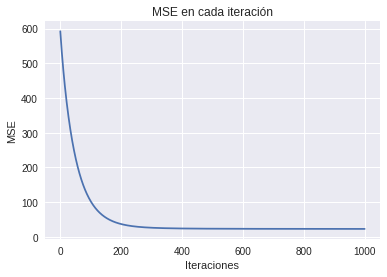

In [196]:
import matplotlib.pyplot as plt

plt.plot([x for x in range(1000)], MSE_)
plt.title("MSE en cada iteración")
plt.xlabel("Iteraciones")
plt.ylabel("MSE")
plt.show()

Para los valores asignados por defecto se puede ver como el MSE de la solución propuesta $\beta$ converge hacia el minimo, llegando hasta un MSE inferior a 100 antes de las primeras 200 iteraciones, entre las iteraciones 200 y 300 se comienza a notar un estancamiento, esto podría deberse a que el $\eta$ elegido no es optimo o por la cantidad de iteraciones.

> e) Varié la tasa de aprendizaje $\eta \in [0,1]$ del algoritmo SGD del punto d), compare los resultados entre sí y con la solución óptima encontrada en c). Comente

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


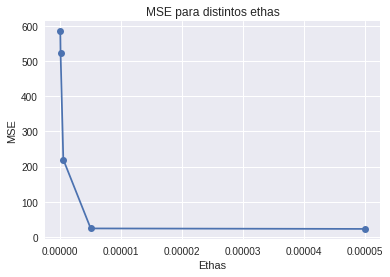

In [203]:
pred_analitic = np.dot(X_train, b_analitic)

betas_MSE = []
MSE_ana_SGD = []

for i in range(3, 9):
  n_t = 0.5*(10**(-i))
  b = regressionBySDG(X_train, y_train, beta_inicial, n_t, frac_sample=1.0, num_iter=1000)
  betas_MSE.append(MSE(y_train, np.dot(X_train, b)))
  MSE_ana_SGD.append(MSE(pred_analitic, np.dot(X_train, b)))

plt.plot([0.5*10**(-x) for x in range(3, 9)], betas_MSE,'o-')
plt.title("MSE para distintos ethas")
plt.xlabel("Ethas")
plt.ylabel("MSE")
plt.show()



Debido a que se utilizan solo 1000 iteraciones valores para $\eta$ menores a 0.00001 el algoritmo comienza a presentar un mayor MSA, esto se debe a que el movimiento realizado en cada iteración es muy bajo para presentar un cambio significativo, para valores mayores de $\eta$, el algoritmo comienza a divergir, los valores no son mostrados debido a que existen problemas de overflow al momento de realizar MSA.

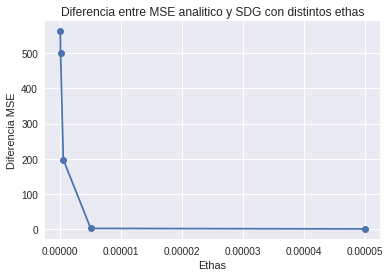

In [204]:
'''plt.plot([0.5*10**(-x) for x in range(3, 9)], MSE_ana_SGD, 'o-')
plt.title("Diferencia entre MSE analitico y SDG con distintos ethas")
plt.xlabel("Ethas")
plt.ylabel("Diferencia MSE")
plt.show()
'''

## Referencias
* [1] https://en.wikipedia.org/wiki/Stop_words
* [2] https://en.wikipedia.org/wiki/Lemmatisation 